In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()
X = data.data
y = data.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE for Linear Regression:", mse)

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE for Ridge Regression:", mse)

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE for Lasso Regression:", mse)

MSE for Linear Regression: 2900.1936284934814
MSE for Ridge Regression: 3077.41593882723
MSE for Lasso Regression: 3403.5757216070733


In [5]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse:.2f}")
    return model.coef_



In [6]:
lr_coef = evaluate(lr, "Linear Regression")
ridge_coef = evaluate(ridge, "Ridge Regression")
lasso_coef = evaluate(lasso, "Lasso Regression")

Linear Regression MSE: 2900.19
Ridge Regression MSE: 3077.42
Lasso Regression MSE: 3403.58


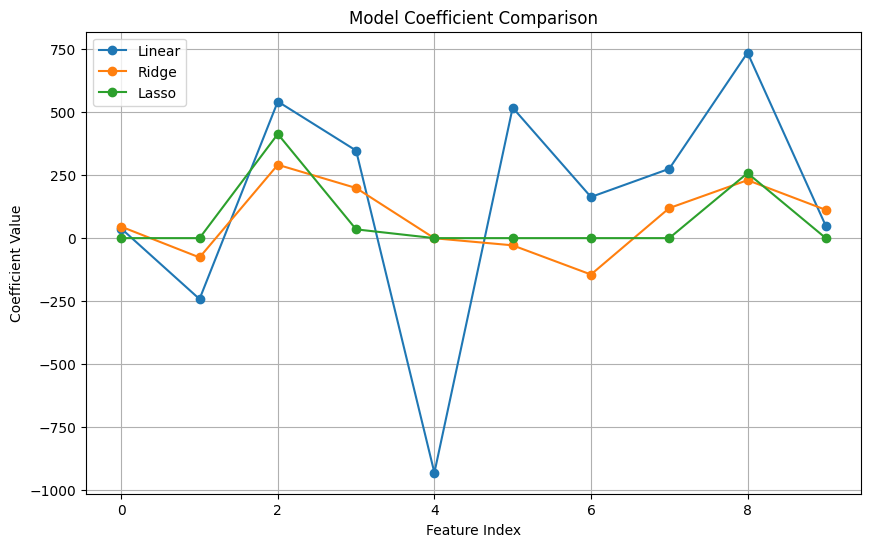

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(lr_coef, 'o-', label='Linear')
plt.plot(ridge_coef, 'o-', label='Ridge')
plt.plot(lasso_coef, 'o-', label='Lasso')
plt.title("Model Coefficient Comparison")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
from sklearn.linear_model import LassoCV, RidgeCV

# Auto-select best alpha
lasso_cv = LassoCV(cv=5).fit(X_train, y_train)
ridge_cv = RidgeCV(cv=5).fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_cv.alpha_)
print("Best alpha for Ridge:", ridge_cv.alpha_)


Best alpha for Lasso: 0.07813983904476522
Best alpha for Ridge: 0.1
